#### Обработка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from scipy import optimize as opt 
import scipy
import scipy.odr as odr

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go

In [4]:
data1 = pd.read_csv('data/experiment1.csv')
data2 = pd.read_csv('data/experiment2.csv')

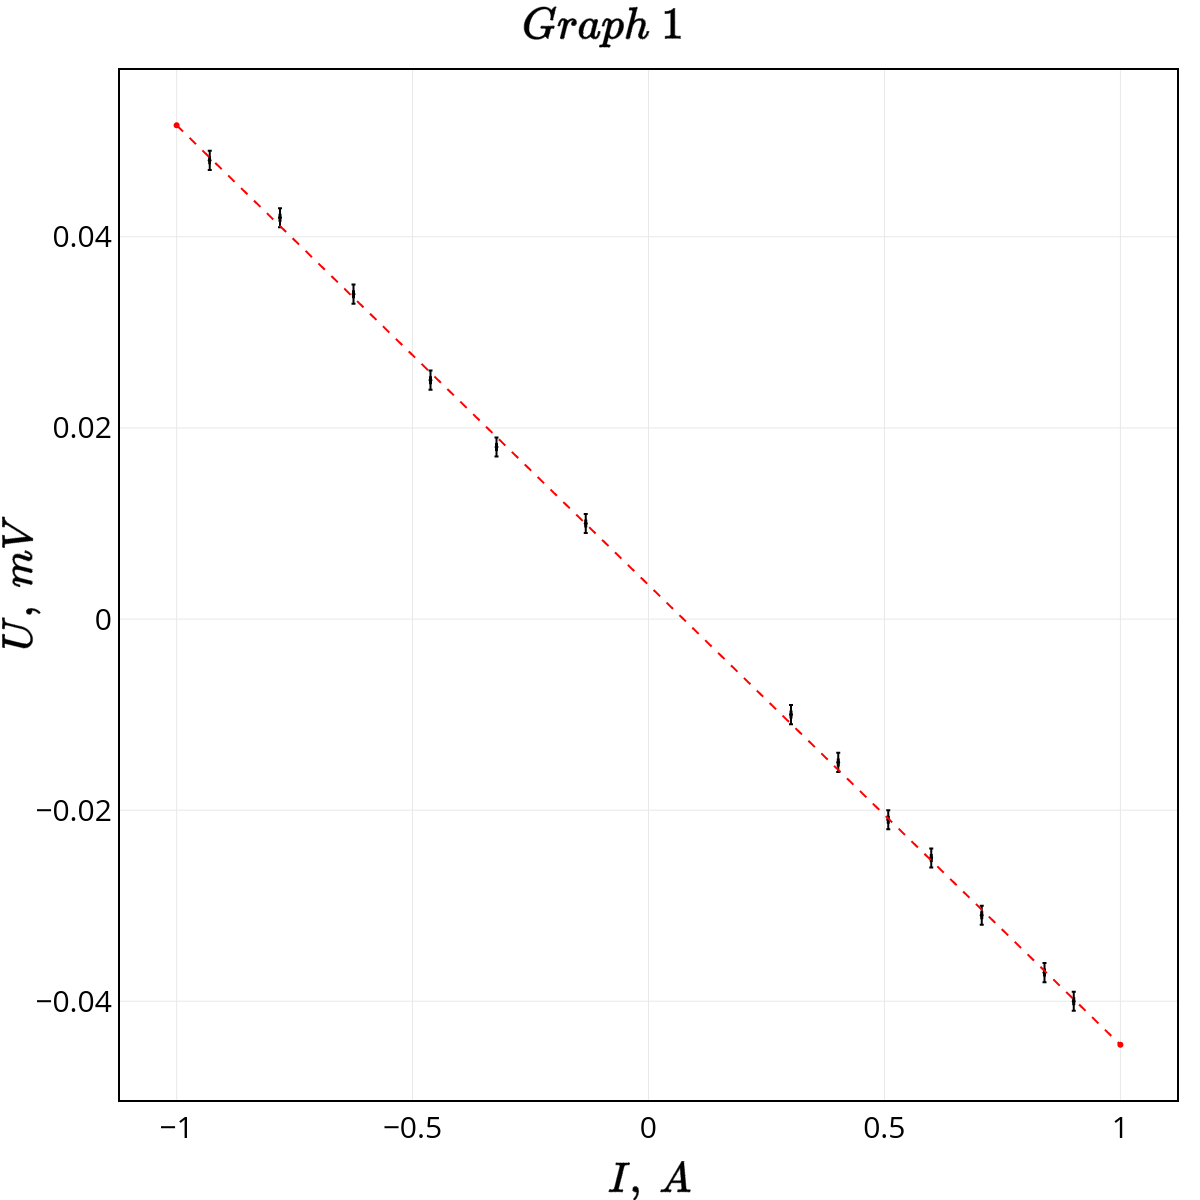

In [5]:
trace1 = go.Scatter(
    x = data1['I'],
    y = data1['U'],
    mode = 'markers',
    error_y = dict(
        type = 'constant',
        value = 0.001,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'constant',
        value = 0.001,
        visible = True,
        color = '#000000'
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = [-1, 1],
    y = [(3.56185398e-06 + 4.81116551e-05) * 1000, (3.56185398e-06 - 4.81116551e-05) * 1000],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2]

layout = go.Layout(
    title = "$Graph~1$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$I,~A$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$U,~mV$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot1.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot1.png", width=500)

In [6]:
Y = np.reshape(np.array(data1['U']) * 0.001, (1, len(data1['U'])))
X = np.reshape(np.array(data1['I']), (1, len(data1['I'])))
def f(x, a, b):
    return a + b * x 
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print(parameters_opt_1)
print(np.sqrt(np.diag(parameters_cov_1)))

[  3.56185398e-06  -4.81116551e-05]
[  1.84075511e-07   2.94346710e-07]


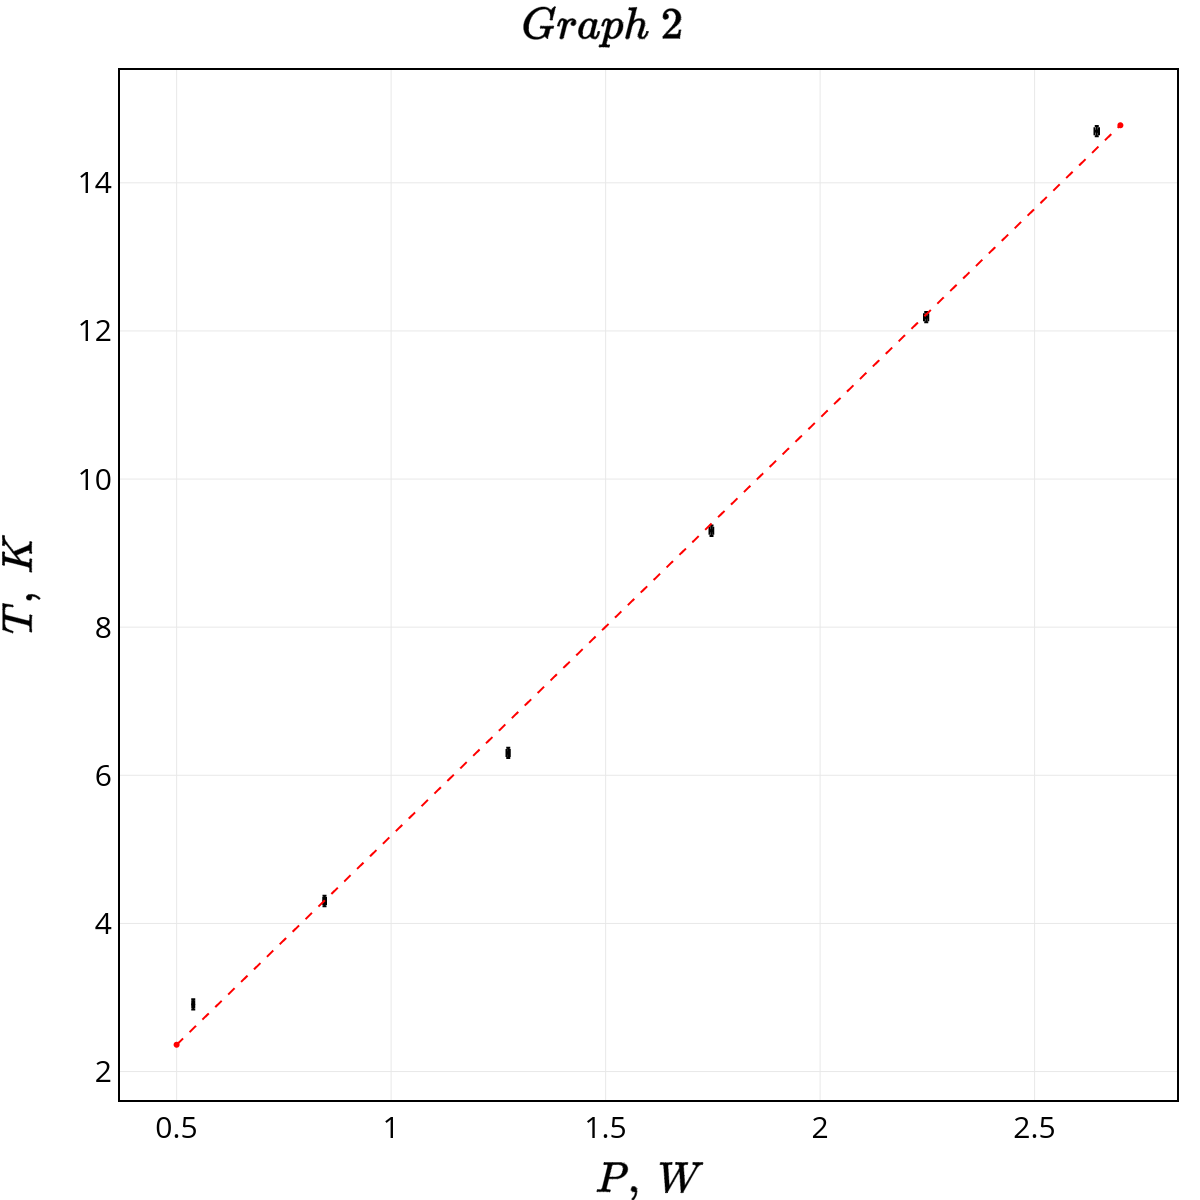

In [11]:
trace1 = go.Scatter(
    x = - data2['I'] * data2['V'],
    y = data2['T'] / (43 * 0.001),
    mode = 'markers',
    error_y = dict(
        type = 'constant',
        value = 0.003 / (43 * 0.001),
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'array',
        array = - data2['I'] * data2['V'] * (0.001 / data2['I'] + 0.001 / data2['V']),
        visible = True,
        color = '#000000'
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = [0.5, 2.7],
    y = [(-0.45988357 + 0.5 * 5.64338101), (-0.45988357 + 2.7 * 5.64338101)],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2]

layout = go.Layout(
    title = "$Graph~2$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$P,~W$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$T,~K$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot2.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot2.png", width=500)

In [12]:
Y = np.reshape(np.array(data2['T'] / (43 * 0.001)), (1, len(data2['T'] / (43 * 0.001))))
X = np.reshape(np.array(- data2['I'] * data2['V']), (1, len(- data2['I'] * data2['V'])))
def f(x, a, b):
    return a + b * x 
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print(parameters_opt_1)
print(np.sqrt(np.diag(parameters_cov_1)))

[-0.45988357  5.64338101]
[ 0.2778857   0.16169649]


In [19]:
 (-4.81116551e-05 / (5.64338101 * (273 + 25 + 15)))

-2.723745886988496e-08